In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import  matplotlib.pyplot as plt

In [2]:
import muon as mu
from muon import prot as pt
from mudata import MuData

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/si

In [3]:
import os

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
sc.set_figure_params(frameon=False, figsize=(4,4))

In [157]:
file_dir = '/Users/anasuyadighe/Downloads/'
samples = ['P1-TD-d8','P2-T1-d8','P3-TD-d12','P4-T2-d12','P5-T0-d15','P6-T4-d15']
paths = [file_dir + n + '/' for n in samples]

In [158]:
paths

['/Users/anasuyadighe/Downloads/P1-TD-d8/',
 '/Users/anasuyadighe/Downloads/P2-T1-d8/',
 '/Users/anasuyadighe/Downloads/P3-TD-d12/',
 '/Users/anasuyadighe/Downloads/P4-T2-d12/',
 '/Users/anasuyadighe/Downloads/P5-T0-d15/',
 '/Users/anasuyadighe/Downloads/P6-T4-d15/']

In [159]:
mdatas_rna = []
mdatas_prot = []
mdatas_raw_rna = []
mdatas_raw_prot = []
isotype_controls = ['IgG2b_control_TotalSeqB','IgG1_control_TotalSeqB','IgG2a_control_TotalSeqB']

In [160]:
for path1, sample in zip(paths, samples):
    # reading in filtered data
    adatas = mu.read_10x_h5(os.path.join(path1, "sample_filtered_feature_bc_matrix.h5"))
    adatas.var_names_make_unique()

    adatas_raw = mu.read_10x_h5(os.path.join(path1, "raw_feature_bc_matrix.h5"))
    adatas_raw.var_names_make_unique()

    # complete per sample protein normalization
    # hanging on to non-norm data
    adatas.mod['prot'].layers["counts"] = adatas.mod['prot'].X

    # do the norm
    mu.prot.pp.dsb(adatas.mod['prot'], adatas_raw.mod['prot'], isotype_controls=isotype_controls)

    mdatas_rna.append(adatas.mod['rna'])
    mdatas_prot.append(adatas.mod['prot'])

    mdatas_raw_rna.append(adatas_raw.mod['rna'])
    mdatas_raw_prot.append(adatas_raw.mod['prot'])

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/muon/_prot/preproc.py:109: UserWarning: empty_counts_range values are not provided, treating all the non-cells as empty droplets
  warn(


In [161]:
mdata_rna = mdatas_rna[0].concatenate(mdatas_rna[1:], batch_key='sample', batch_categories=samples)
mdata_prot = mdatas_prot[0].concatenate(mdatas_prot[1:], batch_key='sample', batch_categories=samples)

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [162]:
mdata_raw_rna = mdatas_raw_rna[0].concatenate(mdatas_raw_rna[1:], batch_key='sample', batch_categories=samples)
mdata_raw_prot = mdatas_raw_prot[0].concatenate(mdatas_raw_prot[1:], batch_key='sample', batch_categories=samples)

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [163]:
mdata = MuData({"rna": mdata_rna, "prot": mdata_prot})
mdata_raw = MuData({"rna": mdata_raw_rna, "prot": mdata_raw_prot})

In [164]:
del mdatas_rna, mdatas_prot, mdatas_raw_rna, mdatas_raw_prot

In [165]:
prot = mdata.mod['prot']
sc.tl.pca(prot)
sc.pp.neighbors(prot)
sc.tl.umap(prot)


/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


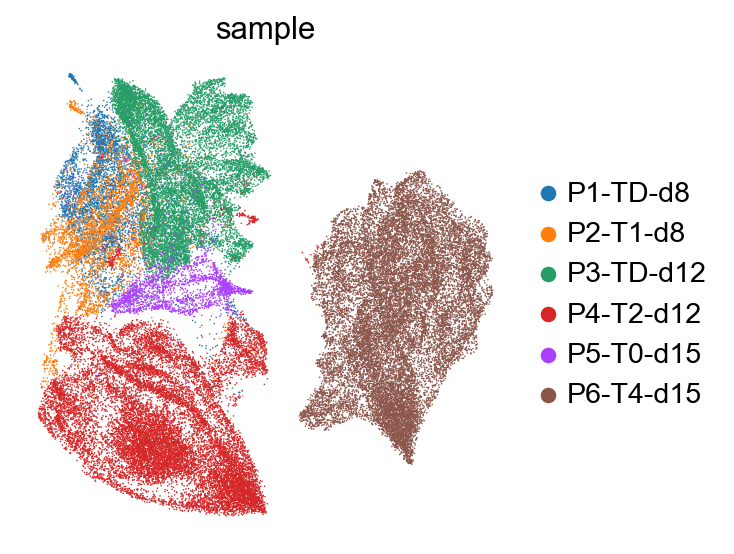

In [166]:
sc.pl.umap(prot, color='sample')


In [167]:
prot.obs['sample']

AAACAAGCATGGATTG-1-P1-TD-d8      P1-TD-d8
AAACCAATCTAATTGC-1-P1-TD-d8      P1-TD-d8
AAACCAGGTCATGAAG-1-P1-TD-d8      P1-TD-d8
AAACGGGCAAGTTAAC-1-P1-TD-d8      P1-TD-d8
AAACGGGCAGAAAGGT-1-P1-TD-d8      P1-TD-d8
                                  ...    
TTTGTGAGTTAATTCG-1-P6-T4-d15    P6-T4-d15
TTTGTGAGTTCAAGGA-1-P6-T4-d15    P6-T4-d15
TTTGTGAGTTGCGGCT-1-P6-T4-d15    P6-T4-d15
TTTGTGAGTTGGCGAG-1-P6-T4-d15    P6-T4-d15
TTTGTGAGTTTAACCA-1-P6-T4-d15    P6-T4-d15
Name: sample, Length: 60263, dtype: category
Categories (6, object): ['P1-TD-d8', 'P2-T1-d8', 'P3-TD-d12', 'P4-T2-d12', 'P5-T0-d15', 'P6-T4-d15']

In [168]:
prot

AnnData object with n_obs × n_vars = 60263 × 27
    obs: 'sample'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca', 'neighbors', 'umap', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [169]:
rna = mdata.mod['rna']

In [170]:
rna.var['gene_ids']

Xkr4       ENSMUSG00000051951
Rp1        ENSMUSG00000025900
Sox17      ENSMUSG00000025902
Lypla1     ENSMUSG00000025903
Tcea1      ENSMUSG00000033813
                  ...        
mt-Nd4     ENSMUSG00000064363
mt-Nd5     ENSMUSG00000064367
mt-Nd6     ENSMUSG00000064368
mt-Cytb    ENSMUSG00000064370
Vamp7      ENSMUSG00000051412
Name: gene_ids, Length: 19059, dtype: object

In [171]:
#rna.var['mt'] = rna.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
#sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=False, rotation = 45,legend = False)

KeyError: "Could not find keys '['n_genes_by_counts', 'pct_counts_mt', 'total_counts']' in columns of `adata.obs` or in adata.var_names."

In [172]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: x >= 200)
mu.pp.filter_obs(rna, 'total_counts', lambda x: x > 500)
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 7.5)

ValueError: Column name from .obs or one of the var_names was expected but got n_genes_by_counts.

In [173]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, rotation = 45, multi_panel=False, legend=False)


KeyError: "Could not find keys '['n_genes_by_counts', 'pct_counts_mt', 'total_counts']' in columns of `adata.obs` or in adata.var_names."

In [45]:
sc.pp.normalize_per_cell(rna, counts_per_cell_after=1e6)
sc.pp.log1p(rna)

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1169: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if groups and is_categorical_dtype(values):
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


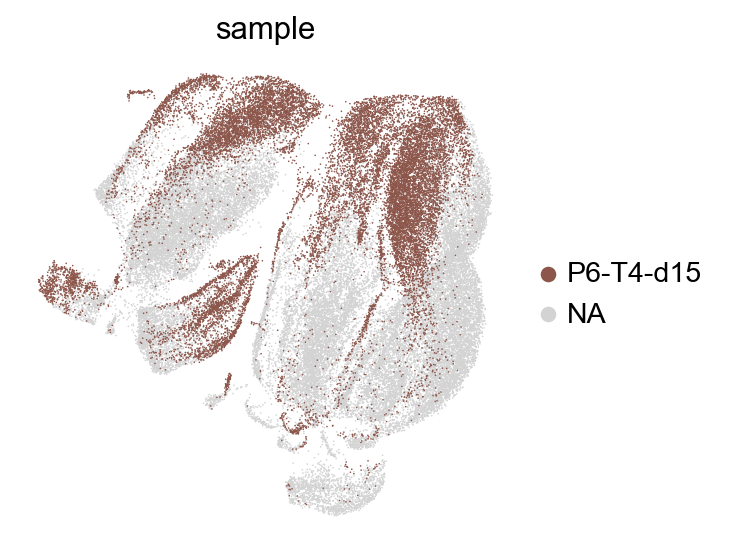

In [46]:
sc.tl.pca(rna, svd_solver='arpack')
sc.pp.neighbors(rna, n_neighbors=15, n_pcs=50)
sc.tl.umap(rna)
sc.pl.umap(rna, color='sample', groups=['P6-T4-d15'])

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


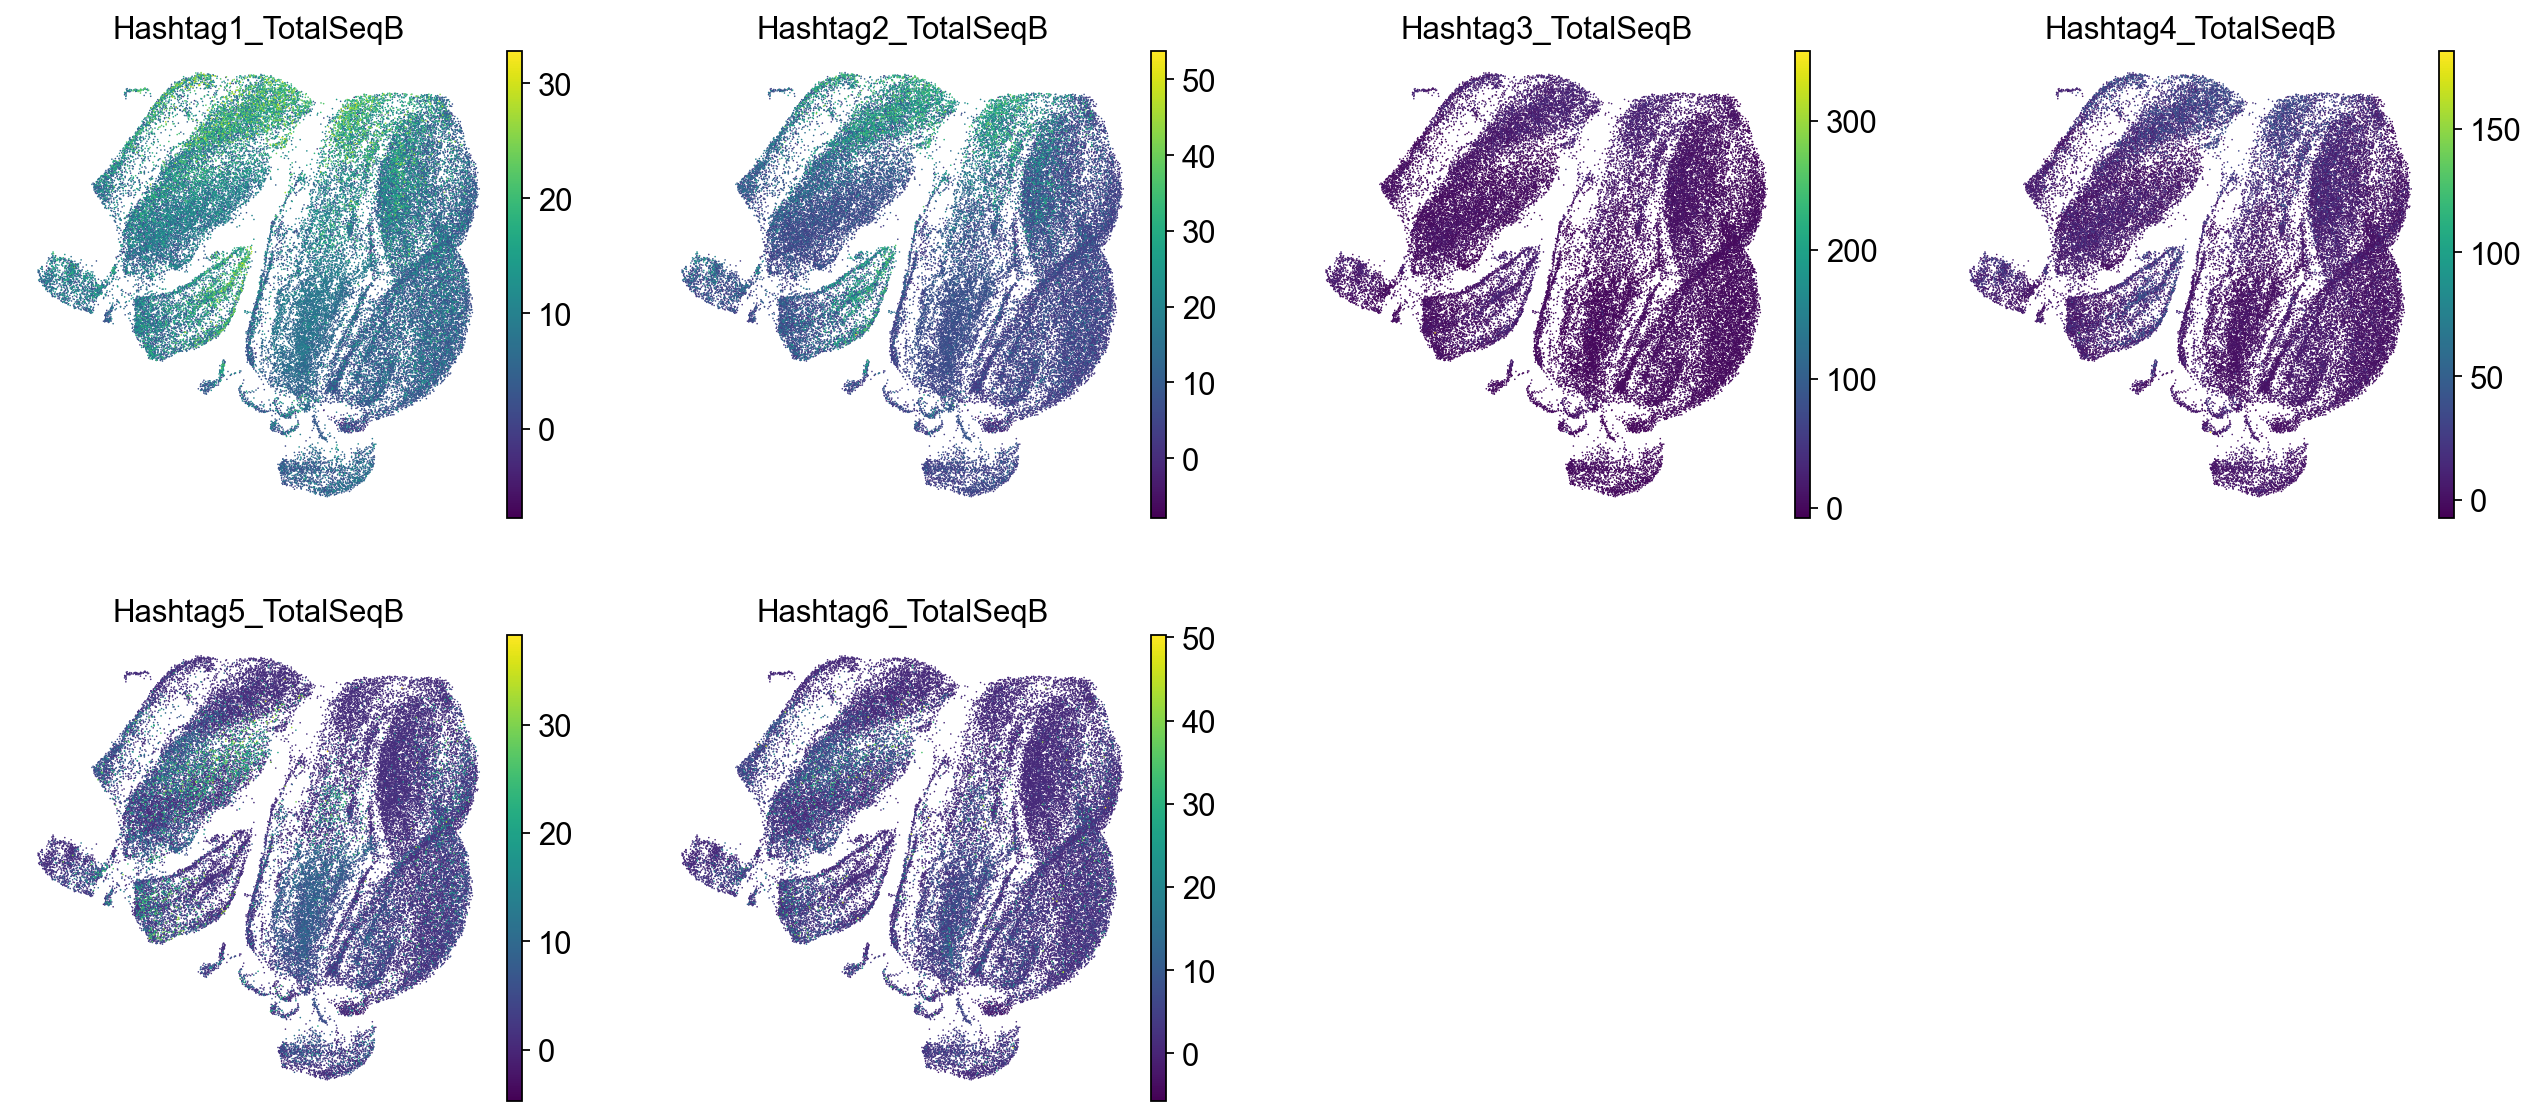

In [47]:
mu.pl.embedding(mdata, basis="rna:X_umap", color=['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag3_TotalSeqB','Hashtag4_TotalSeqB', 'Hashtag5_TotalSeqB', 'Hashtag6_TotalSeqB'])

In [48]:
hash_data = prot[:, :6].copy().to_df()
hash_data['sample'] = prot.obs['sample']

In [152]:
hash_data = hash_data.loc[rna.obs_names.values]
#hash_data['leiden'] = rna.obs['leiden']
# updating to include leiden clustering (to distinguish CD45 +/-)
#sns.displot(data=hash_data, x="Hashtag1_TotalSeqB", hue="sample", kind="kde")

In [58]:
sc.tl.leiden(rna)

In [153]:
rna_sing

AnnData object with n_obs × n_vars = 0 × 19059
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'hashing', 'hashtag'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'sample_colors', 'leiden'
    obsm: 'X_pca', 'X_umap', 'hash_onoff'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [59]:
hash_data['leiden'] = rna.obs['leiden']

In [60]:
rna.obs

sample  n_genes_by_counts  total_counts  \
AAACAAGCATGGATTG-1-P1-TD-d8    P1-TD-d8               2686        6498.0   
AAACCAATCTAATTGC-1-P1-TD-d8    P1-TD-d8                832        1146.0   
AAACCAGGTCATGAAG-1-P1-TD-d8    P1-TD-d8                894        1619.0   
AAACGGGCAAGTTAAC-1-P1-TD-d8    P1-TD-d8               1151        1662.0   
AAACGGGCAGAAAGGT-1-P1-TD-d8    P1-TD-d8               1303        1999.0   
...                                 ...                ...           ...   
TTTGTGAGTTAATTCG-1-P6-T4-d15  P6-T4-d15               2467        4927.0   
TTTGTGAGTTCAAGGA-1-P6-T4-d15  P6-T4-d15               2828        5535.0   
TTTGTGAGTTGCGGCT-1-P6-T4-d15  P6-T4-d15               1891        4057.0   
TTTGTGAGTTGGCGAG-1-P6-T4-d15  P6-T4-d15               1428        2375.0   
TTTGTGAGTTTAACCA-1-P6-T4-d15  P6-T4-d15               1737        3659.0   

                              total_counts_mt  pct_counts_mt  n_counts leiden  
AAACAAGCATGGATTG-1-P1-TD-d8             103.0       1.585103    6498.0     13  
AAACCAATCTAATTGC-1-P1-TD-d8              14.0       1.221640    1146.0      2  
AAACCAGGTCATGAAG-1-P1-TD-d8               5.0       0.308833    1619.0      2  
AAACGGGCAAGTTAAC-1-P1-TD-d8              11.0       0.661853    1662.0     11  
AAACGGGCAGAAAGGT-1-P1-TD-d8              64.0       3.201601    1999.0     10  
...                                       ...            ...       ...    ...  
TTTGTGAGTTAATTCG-1-P6-T4-d15              7.0       0.142074    4927.0      1  
TTTGTGAGTTCAAGGA-1-P6-T4-d15             68.0       1.228546    5535.0     17  
TTTGTGAGTTGCGGCT-1-P6-T4-d15             25.0       0.616219    4057.0     21  
TTTGTGAGTTGGCGAG-1-P6-T4-d15             11.0       0.463158    2375.0     12  
TTTGTGAGTTTAACCA-1-P6-T4-d15             22.0       0.601257    3659.0      1  

[57471 rows x 7 columns]

In [61]:
hash_data['leiden'] = rna.obs['leiden']


/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


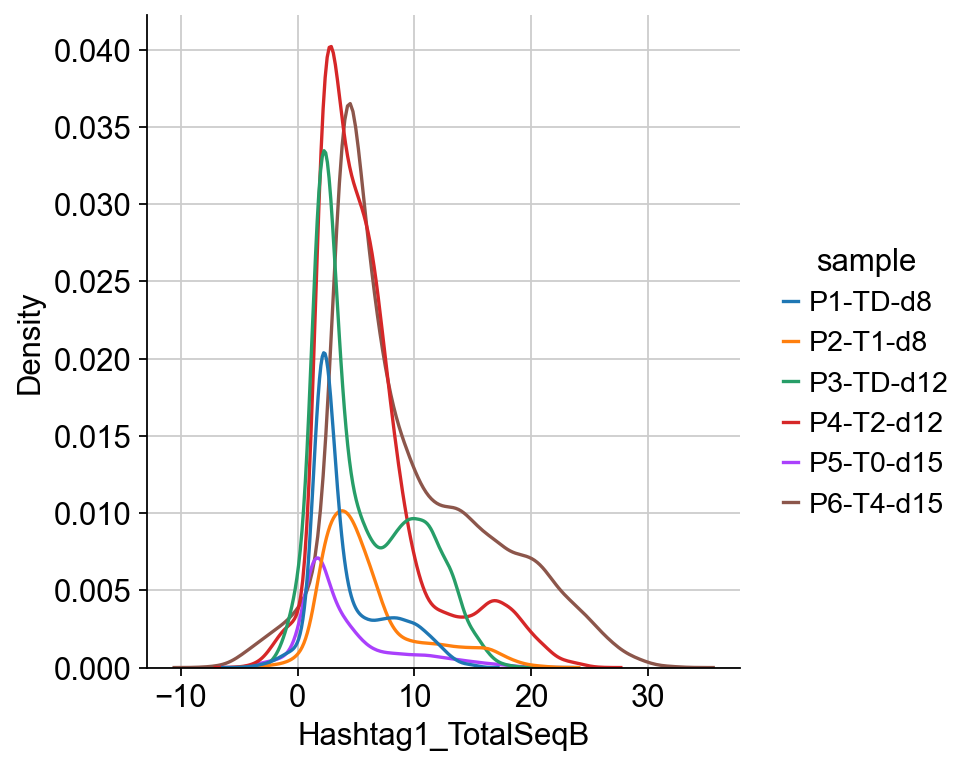

In [62]:
sns.displot(data=hash_data, x="Hashtag1_TotalSeqB", hue="sample", kind="kde")

In [63]:
hash_onoff = np.zeros((hash_data.shape[0], hash_data.shape[1]-2))

In [64]:
hash_dict = {'P1-TD-d8': ['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag3_TotalSeqB', 'Hashtag4_TotalSeqB', 'Hashtag5_TotalSeqB', 'Hashtag6_TotalSeqB'],
             'P2-T1-d8': ['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag3_TotalSeqB', 'Hashtag4_TotalSeqB', 'Hashtag5_TotalSeqB', 'Hashtag6_TotalSeqB'],
             'P3-TD-d12': ['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag3_TotalSeqB', 'Hashtag4_TotalSeqB'],
             'P4-T2-d12': ['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag5_TotalSeqB', 'Hashtag6_TotalSeqB'],
             'P5-T0-d15': ['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag5_TotalSeqB', 'Hashtag6_TotalSeqB'],
             'P6-T4-d15': ['Hashtag1_TotalSeqB', 'Hashtag2_TotalSeqB', 'Hashtag3_TotalSeqB', 'Hashtag4_TotalSeqB']}

In [155]:
c = 0
for hashtag in hash_data.columns[:6]:
    # fig, axes = plt.subplots(1, 6, figsize=(18, 3.5))
    b = 0
    column_array = np.array([])
    for condition in np.unique(hash_data['sample']):
        subset = hash_data[hash_data['sample'] == condition]  # [hashtag].values
        subset_col = np.zeros(len(subset))

        plot_df = pd.DataFrame({'data': subset[hashtag], 'leiden': hash_data[hash_data['sample'] == condition]['leiden'].values})
        #
        # sns.displot(data=plot_df, x='data', hue='leiden')
        # # # # axes[b].set_ylim(0, 0.275)
        # plt.title(condition + ' ' + hashtag)
        # plt.tight_layout()

        thresh = np.zeros(len(np.unique(hash_data['leiden'])))
        for cluster in np.unique(hash_data['leiden']):
            subset_cd45 = subset[subset['leiden'] == cluster][hashtag].values

            # GMM fitting
            N = np.arange(1, 3)
            models = [None for p in range(len(N))]
            for k in range(len(N)):
                models[k] = GaussianMixture(N[k]).fit(subset_cd45.reshape(-1, 1))
            BIC = [m.bic(subset_cd45.reshape(-1, 1)) for m in models]  # Lauffenburger paper chooses best GMM by minimizing BIC
            # print(BIC)
            M_best = models[np.argmin(BIC)]
            gmm_labels = M_best.predict(subset_cd45.reshape(-1, 1))

            centroids = np.zeros(len(np.unique(gmm_labels)))
            for k in np.unique(gmm_labels):
                #     axes[b].axvline(np.mean(subset[np.where(gmm_labels == k)]), color='orange')
                centroids[k] = np.mean(subset_cd45[np.where(gmm_labels == k)])

            thresh[int(cluster)] = subset_cd45[np.where(gmm_labels == np.argmin(centroids))].max()
        # print(centroids)
        # ind_max = np.argmax(subset)
        # on_marker = np.where(gmm_labels == gmm_labels[ind_max])[0]
        # for d in on_marker:
        print(thresh)
        sns.displot(data=plot_df, x='data', hue='leiden')
        # # # # axes[b].set_ylim(0, 0.275)
        plt.title(condition + ' ' + hashtag)
        plt.axvline(thresh[0], color='C0')
        plt.axvline(thresh[1], color='C1')
        plt.tight_layout()

        v = 0
        for d in subset.index:
            if subset['leiden'].loc[d] == '0':
                if subset[hashtag].loc[d] > thresh[0]:
                    subset_col[v] = 1
            elif subset['leiden'].loc[d] == '1':
                if subset[hashtag].loc[d] > thresh[1]:
                    subset_col[v] = 1
            v = v + 1

        # for d in np.where(subset > subset[np.where(gmm_labels == np.argmin(centroids))].max())[0]:
        #     subset_col[d] = 1

        b = b + 1
        column_array = np.concatenate((column_array, subset_col))
    hash_onoff[:, c] = column_array
    c = c + 1

# correction in post to make sure thresholds are ok/no false positives
# ind = np.where(prot[:, :6].X < 0)
# for q in np.arange(len(ind[0])):
#     x = ind[0][q]
#     y = ind[1][q]
#     hash_onoff[x, y] = 0

hash_onoff[np.where(hash_data['sample'].str.contains('P3'))[0], 4:6] = np.zeros((len(np.where(hash_data['sample'].str.contains('P3'))[0]),2))
hash_onoff[np.where(hash_data['sample'].str.contains('P4'))[0], 2:4] = np.zeros((len(np.where(hash_data['sample'].str.contains('P4'))[0]),2))
hash_onoff[np.where(hash_data['sample'].str.contains('P5'))[0], 2:4] = np.zeros((len(np.where(hash_data['sample'].str.contains('P5'))[0]),2))
hash_onoff[np.where(hash_data['sample'].str.contains('P6'))[0], 4:6] = np.zeros((len(np.where(hash_data['sample'].str.contains('P6'))[0]),2))

# limit to indices included in transcriptional data
hash_df = pd.DataFrame(data=hash_onoff, index=rna.obs_names.values, columns=hash_data.columns[:6])
hash_rna = hash_df.loc[rna.obs_names.values]

hash_sum = np.sum(hash_rna, axis=1)
rna.obs['hashing'] = [str(g) for g in hash_sum]


ValueError: Found array with 1 sample(s) (shape=(1, 1)) while a minimum of 2 is required by GaussianMixture.

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1169: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if groups and is_categorical_dtype(values):
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


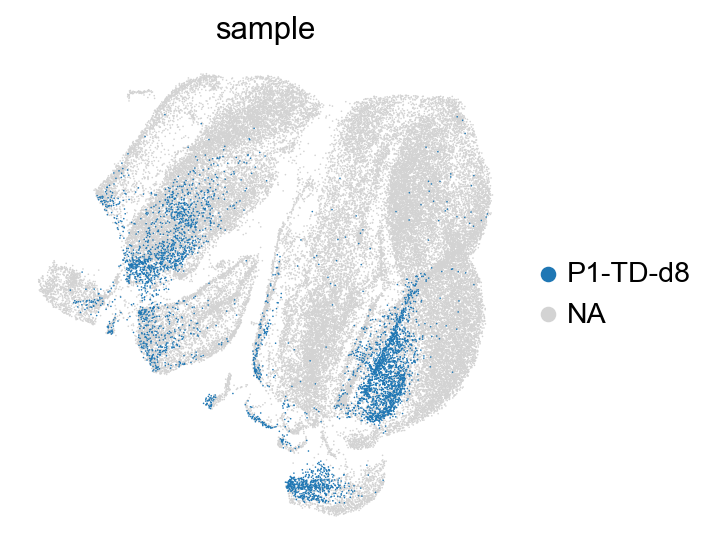

In [156]:
sc.pl.umap(rna, color='sample', groups=['P1-TD-d8'])

In [105]:
unt_d8 = np.where(rna.obs['sample'] == 'P1-TD-d8')[0]

In [134]:
all_unt = []
unt_d12 = np.where(rna.obs['sample'] == 'P3-TD-d12')[0]
unt_d15 = np.where(rna.obs['sample'] == 'P5-T0-d15')[0]
adatas = rna[np.concatenate((unt_d8, unt_d12,unt_d15)), :]
all_unt.append(adatas.copy())

In [138]:
untreated_sample = all_unt[0]

In [139]:
untreated_sample

AnnData object with n_obs × n_vars = 17592 × 19059
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'hashing'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'sample_colors', 'leiden'
    obsm: 'X_pca', 'X_umap', 'hash_onoff'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [140]:
def remove_recompute(adata):
    del adata.obsm['X_umap'], adata.obsm['X_pca'], adata.obsp, adata.uns
    sc.tl.pca(adata, svd_solver='auto')
    sc.pp.neighbors(adata)  # using with default parameters
    sc.tl.umap(adata)
    # sc.tl.diffmap(adata)
    return adata

In [141]:
untreated_sample = remove_recompute(untreated_sample)

In [143]:
untreated_sample.obs

sample  n_genes_by_counts  total_counts  \
AAACAAGCATGGATTG-1-P1-TD-d8    P1-TD-d8               2686        6498.0   
AAACCAATCTAATTGC-1-P1-TD-d8    P1-TD-d8                832        1146.0   
AAACCAGGTCATGAAG-1-P1-TD-d8    P1-TD-d8                894        1619.0   
AAACGGGCAAGTTAAC-1-P1-TD-d8    P1-TD-d8               1151        1662.0   
AAACGGGCAGAAAGGT-1-P1-TD-d8    P1-TD-d8               1303        1999.0   
...                                 ...                ...           ...   
TTTGGACGTACGCACC-1-P5-T0-d15  P5-T0-d15               2013        3786.0   
TTTGGACGTAGTAGCA-1-P5-T0-d15  P5-T0-d15               1440        2286.0   
TTTGGACGTGGTTATC-1-P5-T0-d15  P5-T0-d15               2919        8125.0   
TTTGGCGGTTTACTGA-1-P5-T0-d15  P5-T0-d15               3311        7520.0   
TTTGTGAGTCGTTCTC-1-P5-T0-d15  P5-T0-d15               1079        1779.0   

                              total_counts_mt  pct_counts_mt  n_counts leiden  \
AAACAAGCATGGATTG-1-P1-TD-d8             103.0       1.585103    6498.0     13   
AAACCAATCTAATTGC-1-P1-TD-d8              14.0       1.221640    1146.0      2   
AAACCAGGTCATGAAG-1-P1-TD-d8               5.0       0.308833    1619.0      2   
AAACGGGCAAGTTAAC-1-P1-TD-d8              11.0       0.661853    1662.0     11   
AAACGGGCAGAAAGGT-1-P1-TD-d8              64.0       3.201601    1999.0     10   
...                                       ...            ...       ...    ...   
TTTGGACGTACGCACC-1-P5-T0-d15            146.0       3.856313    3786.0      0   
TTTGGACGTAGTAGCA-1-P5-T0-d15             20.0       0.874891    2286.0     20   
TTTGGACGTGGTTATC-1-P5-T0-d15             10.0       0.123077    8125.0      1   
TTTGGCGGTTTACTGA-1-P5-T0-d15             33.0       0.438830    7520.0     14   
TTTGTGAGTCGTTCTC-1-P5-T0-d15              8.0       0.449691    1779.0     11   

                             hashing  
AAACAAGCATGGATTG-1-P1-TD-d8      0.0  
AAACCAATCTAATTGC-1-P1-TD-d8      0.0  
AAACCAGGTCATGAAG-1-P1-TD-d8      0.0  
AAACGGGCAAGTTAAC-1-P1-TD-d8      0.0  
AAACGGGCAGAAAGGT-1-P1-TD-d8      0.0  
...                              ...  
TTTGGACGTACGCACC-1-P5-T0-d15     0.0  
TTTGGACGTAGTAGCA-1-P5-T0-d15     0.0  
TTTGGACGTGGTTATC-1-P5-T0-d15     0.0  
TTTGGCGGTTTACTGA-1-P5-T0-d15     0.0  
TTTGTGAGTCGTTCTC-1-P5-T0-d15     0.0  

[17592 rows x 8 columns]

/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/anasuyadighe/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


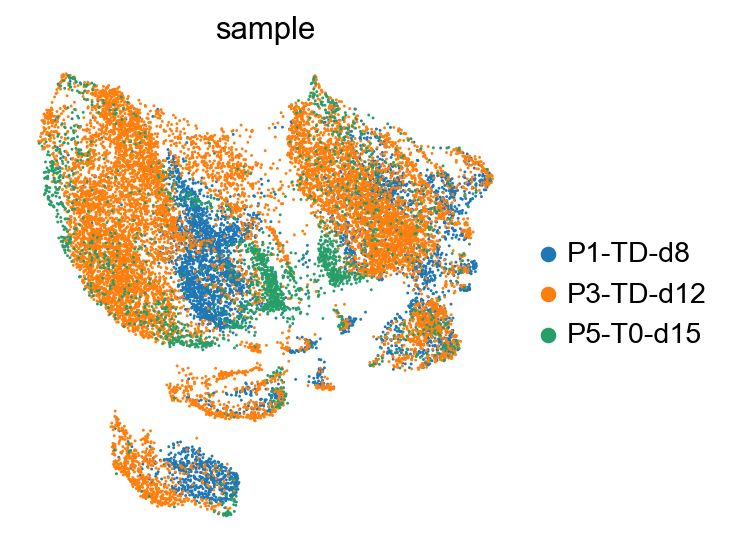

In [147]:
sc.pl.umap(untreated_sample, color='sample')

In [150]:
import muon as mu
from muon import prot as pt
from mudata import MuData
#

In [151]:
test = ('/Users/anasuyadighe/Downloads/20230616_GAP-hashed-persamplenorm-iter2.h5mu')

AttributeError: type object 'MuData' has no attribute 'read_h5mu'